# MATH 210 Introduction to Mathematical Computing

## November 19, 2018

* Applications of eigenvalues and eigenvectors
    * Graph theory
    * Systems of ODEs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

## Simple, connected, undirected graphs

Given a graph, we can construct its [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix). The eigenvalues of the adjacency matrix give us information about the structure of the graph.

For example, the number of [triangles](https://en.wikipedia.org/wiki/Adjacency_matrix#Matrix_powers) in a graph $T(G)$ is given by:

$$
T(G) = \frac{1}{6} ( \lambda_1^3 + \lambda_2^3 + \cdots + \lambda_n^3)
$$

where $\lambda_1 \leq \lambda_2 \leq \cdots \leq \lambda_n$ are the eigenvalues of the adjacency matrix.

Let's write a function called `triangles` which takes a square matrix `M` and return the sum

$$
\frac{1}{6} ( \lambda_1^3 + \lambda_2^3 + \cdots + \lambda_n^3)
$$

where $\lambda_i$ are the eigenvalues of the symmetric matrix $A = (M + M^T)/2$. Note that $M = A$ if $M$ is symmetric. The return value is the number of triangles in the graph $G$ if the input $M$ is the adjacency matrix.

In [2]:
def triangles(M):
    A = (M + M.T)/2
    eigvals, eigvecs = la.eig(A)
    eigvals = eigvals.real
    return np.sum(eigvals**3)/6

Let's use the Python package [NeworkX](https://networkx.github.io/) to construct some simple graphs.

In [3]:
import networkx as nx

A [complete graph](https://en.wikipedia.org/wiki/Complete_graph) with $n$ nodes is the graphs where every node is connected to every other node.

In [4]:
G = nx.complete_graph(4)

The adjacency matrix is all 1s with 0s along the diagonal.

In [5]:
A = nx.adjacency_matrix(G).todense()

In [6]:
A

matrix([[0, 1, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 1, 1, 0]], dtype=int64)

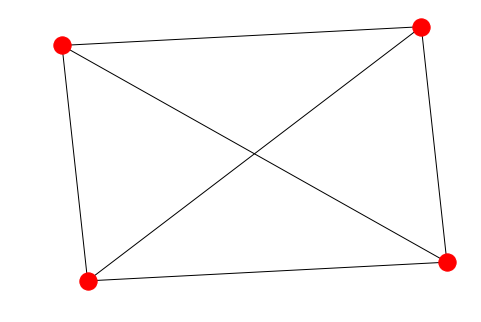

In [7]:
nx.draw(G)

We can count the number of triangles.

In [8]:
triangles(A)

4.0

Next, let's try a [Turan graph](https://en.wikipedia.org/wiki/Tur%C3%A1n_graph).

In [9]:
G = nx.turan_graph(10,5)

In [10]:
A = nx.adjacency_matrix(G).todense()

In [11]:
A

matrix([[0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]], dtype=int64)

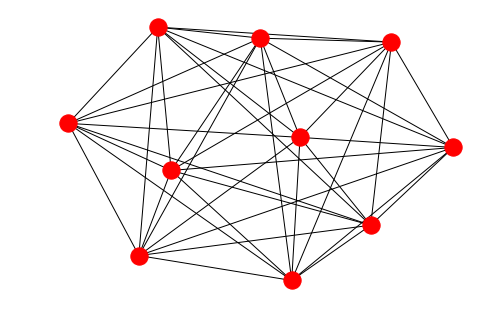

In [12]:
nx.draw(G)

Find the number of triangles:

In [13]:
triangles(A)

80.000000000000114

## Linear systems of sifferential equations

Compute the unique solution of the [linear system of differential equations](https://en.wikipedia.org/wiki/Matrix_differential_equation) $\dot{\mathbf{x}} = A\mathbf{x}$ where

$$
A = \begin{bmatrix}
1 & 1 \\
-1 & 1
\end{bmatrix}
$$

and $\mathbf{x}(0)=[0.1,0.1]^T$. Plot $x_1(t)$ versus $x_2(t)$.

In [14]:
A = np.array([[1,1],[-1,1]])
A

array([[ 1,  1],
       [-1,  1]])

The general solution is

$$
\mathbf{x}(t) = C_1 \mathbf{v}_1 e^{\lambda_1 t} + C_2 \mathbf{v}_2 e^{\lambda_2 t}
$$

Since the eigenvalues are complex, the eigenvectors are complex and given {\it real} initial condition $\mathbf{x}(0)$ the coefficients $C_1$, $C_2$ are complex {\it however} the sum defining $\mathbf{x}(t)$ is {\it real}. Let's construct the solution for initial condition $x_1(0)=x_2(0)=0.1$.

In [15]:
eigvals, eigvecs = la.eig(A)

In [16]:
x0 = np.array([0.1,0.1]).reshape(2,1)

In [17]:
C = la.solve(eigvecs,x0)
C

array([[ 0.07071068-0.07071068j],
       [ 0.07071068+0.07071068j]])

In [18]:
t = np.linspace(0,20,200)
x1 = np.real(C[0,0]*eigvecs[0,0]*np.exp(eigvals[0]*t) + C[1,0]*eigvecs[0,1]*np.exp(eigvals[1]*t))
x2 = np.real(C[0,0]*eigvecs[1,0]*np.exp(eigvals[0]*t) + C[1,0]*eigvecs[1,1]*np.exp(eigvals[1]*t))

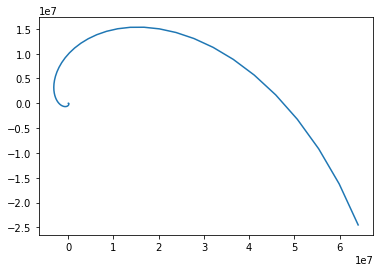

In [19]:
plt.plot(x1,x2)
plt.show()

The eigenvalues are complex with $\mathrm{Re}(\lambda) > 0$ therefore it is a spiral source.